# Landcover mapping

In [33]:
#importing the required libraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout

In [35]:
#to set the working directory
import os
os.chdir("../multiclass_segmentation/")

In [36]:
train_x = np.load('./x_train.npy').astype('float32')
train_y = np.load('./y_train.npy').astype('float32')
test_x = np.load('./x_test.npy').astype('float32')
test_y = np.load('./y_test.npy').astype('float32')

In [37]:
print("The shape of train is ",train_x.shape)
print("The shape of train is ",test_x.shape)


The shape of train is  (70, 128, 128, 3)
The shape of train is  (30, 128, 128, 3)


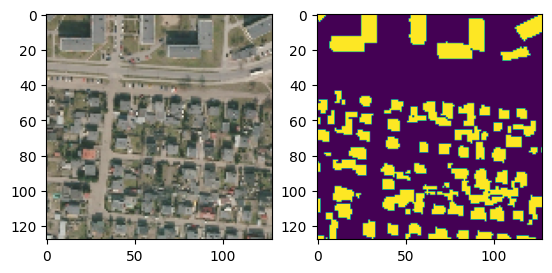

In [38]:
plt.subplot(1,2,1)
plt.imshow(test_x[10,:,:,:].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(test_y[10,:,:,0].astype('uint8'))

In [39]:
'''one-hot encoding'''

from tensorflow.keras.utils import to_categorical

y_train_1hot = to_categorical(train_y)
y_test_1hot = to_categorical(test_y)

y_train_1hot.shape

(70, 128, 128, 4)

# MODEL TRAIN

In [40]:
x_in = Input(shape=(128, 128, 3))

'''Encoder'''
x_temp = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x_temp = Dropout(0.25)(x_temp)
x_skip1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip1)
x_temp = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip2)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.25)(x_temp)
x_skip3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = MaxPooling2D((2,2))(x_skip3)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2D(64, (3, 3), activation='relu', padding='same')(x_temp)

'''Decoder'''
x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip3])
x_temp = Conv2DTranspose(64, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip2])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu',  padding='same')(x_temp)
x_temp = Concatenate()([x_temp, x_skip1])
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)
x_temp = Dropout(0.5)(x_temp)
x_temp = Conv2DTranspose(32, (3, 3), activation='relu',  padding='same')(x_temp)

'''Use 1 by 1 Convolution to get desired output bands'''
x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_temp = Conv2D(32, (1, 1), activation='relu', padding='same')(x_temp)
x_out = Conv2D(4, (1, 1), activation='softmax', padding='same')(x_temp)

model = Model(inputs=x_in, outputs=x_out)

model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 128, 128, 32) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 128, 128, 32) 9248        dropout_8[0][0]                  
_______________________________________________________________________________________

In [41]:
history = model.fit(train_x, y_train_1hot, validation_data=(test_x, y_test_1hot), epochs=250, batch_size = 8, verbose = 1)

Epoch 1/250
9/9 [==============================] - 2s 203ms/step - loss: 4.4555 - val_loss: 1.3964
Epoch 2/250
9/9 [==============================] - 1s 63ms/step - loss: 1.1014 - val_loss: 1.1146
Epoch 3/250
9/9 [==============================] - 1s 64ms/step - loss: 0.9631 - val_loss: 0.9593
Epoch 4/250
9/9 [==============================] - 1s 63ms/step - loss: 0.9017 - val_loss: 0.9131
Epoch 5/250
9/9 [==============================] - 1s 65ms/step - loss: 0.8757 - val_loss: 0.8671
Epoch 6/250
9/9 [==============================] - 1s 63ms/step - loss: 0.8592 - val_loss: 0.8592
Epoch 7/250
9/9 [==============================] - 1s 64ms/step - loss: 0.8559 - val_loss: 0.8575
Epoch 8/250
9/9 [==============================] - 1s 63ms/step - loss: 0.8132 - val_loss: 0.8182
Epoch 9/250
9/9 [==============================] - 1s 65ms/step - loss: 0.7988 - val_loss: 0.7874
Epoch 10/250
9/9 [==============================] - 1s 65ms/step - loss: 0.7611 - val_loss: 0.7963
Epoch 11/250
9/9 [

Epoch 84/250
9/9 [==============================] - 1s 64ms/step - loss: 0.4780 - val_loss: 0.5912
Epoch 85/250
9/9 [==============================] - 1s 64ms/step - loss: 0.4413 - val_loss: 0.4921
Epoch 86/250
9/9 [==============================] - 1s 65ms/step - loss: 0.4282 - val_loss: 0.4494
Epoch 87/250
9/9 [==============================] - 1s 64ms/step - loss: 0.4258 - val_loss: 0.4686
Epoch 88/250
9/9 [==============================] - 1s 65ms/step - loss: 0.4102 - val_loss: 0.4923
Epoch 89/250
9/9 [==============================] - 1s 64ms/step - loss: 0.4106 - val_loss: 0.4544
Epoch 90/250
9/9 [==============================] - 1s 64ms/step - loss: 0.3941 - val_loss: 0.5713
Epoch 91/250
9/9 [==============================] - 1s 65ms/step - loss: 0.4029 - val_loss: 0.4617
Epoch 92/250
9/9 [==============================] - 1s 63ms/step - loss: 0.3907 - val_loss: 0.4805
Epoch 93/250
9/9 [==============================] - 1s 68ms/step - loss: 0.3551 - val_loss: 0.4475
Epoch 94/2

9/9 [==============================] - 1s 66ms/step - loss: 0.2662 - val_loss: 0.3528
Epoch 167/250
9/9 [==============================] - 1s 64ms/step - loss: 0.2589 - val_loss: 0.3214
Epoch 168/250
9/9 [==============================] - 1s 64ms/step - loss: 0.2690 - val_loss: 0.3302
Epoch 169/250
9/9 [==============================] - 1s 64ms/step - loss: 0.2647 - val_loss: 0.3301
Epoch 170/250
9/9 [==============================] - 1s 64ms/step - loss: 0.2700 - val_loss: 0.4230
Epoch 171/250
9/9 [==============================] - 1s 66ms/step - loss: 0.4323 - val_loss: 0.3474
Epoch 172/250
9/9 [==============================] - 1s 64ms/step - loss: 0.3589 - val_loss: 0.3652
Epoch 173/250
9/9 [==============================] - 1s 65ms/step - loss: 0.3642 - val_loss: 0.5121
Epoch 174/250
9/9 [==============================] - 1s 64ms/step - loss: 0.3437 - val_loss: 0.4107
Epoch 175/250
9/9 [==============================] - 1s 65ms/step - loss: 0.3124 - val_loss: 0.3441
Epoch 176/250


9/9 [==============================] - 1s 65ms/step - loss: 0.1649 - val_loss: 0.3226
Epoch 249/250
9/9 [==============================] - 1s 65ms/step - loss: 0.1639 - val_loss: 0.3205
Epoch 250/250
9/9 [==============================] - 1s 64ms/step - loss: 0.1619 - val_loss: 0.3193


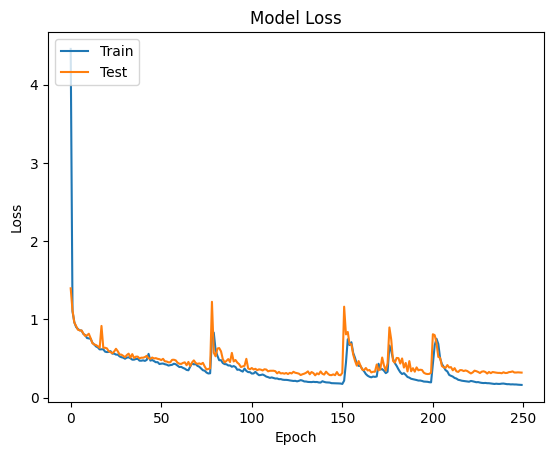

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Prediction

In [44]:
'''Prediction over the test dataset'''
pred_test = model.predict(test_x)

pred_test = np.argmax(pred_test, axis=-1)
print(pred_test.shape)

(30, 128, 128)


### SHOW THE PREDICTION

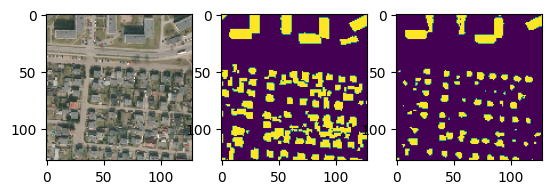

In [47]:
plt.subplot(1,3,1)
plt.imshow(test_x[10,:,:,:].astype('uint8'))
plt.subplot(1,3,2)
plt.imshow(test_y[10,:,:,0].astype('uint8'))
plt.subplot(1,3,3)
plt.imshow(pred_test[10,:,:].astype('uint8'))